##
EDA
##


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

df = pd.read_csv('/content/research2 (2).csv')

In [ ]:
df

,CB_mean,CC_mean,CT_mean,FC_mean,FN_mean,SRT_mean,math_mean,shult_mean,sleep_score
0,668.6,441.5,873.1,855.8,888.7,351.0,1300.0,10461.2,85
1,676.3,457.8,927.6,780.1,986.7,352.0,1139.9,7962.6,83
2,581.1,411.6,907.6,831.5,748.6,337.5,1462.0,10301.8,77
3,609.4,344.4,975.2,884.6,918.0,395.1,1375.6,9407.3,69
4,830.2,394.5,876.9,870.3,941.3,417.5,1417.4,10819.1,70
5,603.3,374.2,1102.0,1069.3,944.1,389.6,1529.2,10095.1,67
6,626.0,383.5,774.0,861.4,1007.8,362.2,1513.0,9500.4,76
7,646.4,393.4,738.0,908.0,946.6,327.5,1351.8,9626.1,74
8,529.3,371.3,760.9,949.2,900.9,345.8,1435.3,9858.8,77
9,803.0,500.8,1136.7,1193.6,1266.3,595.5,1941.0,12680.3,69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CB_mean      15 non-null     float64
 1   CC_mean      15 non-null     float64
 2   CT_mean      15 non-null     float64
 3   FC_mean      15 non-null     float64
 4   FN_mean      15 non-null     float64
 5   SRT_mean     15 non-null     float64
 6   math_mean    15 non-null     float64
 7   shult_mean   15 non-null     float64
 8   sleep_score  15 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 KB


In [ ]:
df.describe()

,CB_mean,CC_mean,CT_mean,FC_mean,FN_mean,SRT_mean,math_mean,shult_mean,sleep_score
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,691.046667,415.560000,985.453333,957.940000,1019.206667,424.040000,1483.006667,10244.313333,74.866667
std,95.355567,53.750373,171.664311,153.166403,151.214268,106.119244,230.316023,1314.923344,5.914470
min,529.300000,344.400000,738.000000,780.100000,748.600000,327.500000,1139.900000,7962.600000,67.000000
25%,617.700000,376.550000,875.000000,864.250000,929.650000,351.500000,1363.700000,9478.200000,69.500000
50%,676.300000,394.500000,975.200000,884.600000,986.700000,389.600000,1435.300000,10095.100000,76.000000
75%,764.800000,449.650000,1119.350000,1009.250000,1103.250000,452.700000,1521.100000,10640.150000,79.500000
max,845.600000,509.900000,1290.400000,1268.200000,1266.300000,678.300000,1941.000000,12944.900000,85.000000


<Axes: >

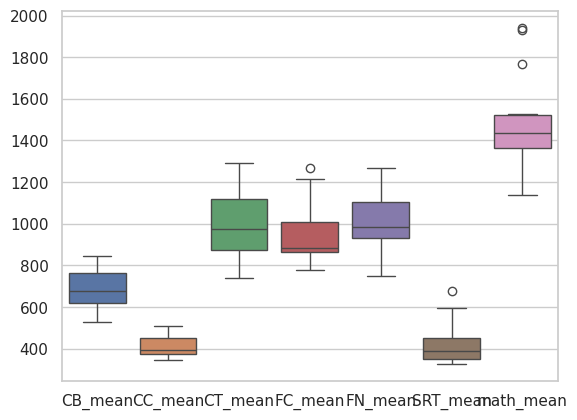

In [ ]:
sns.boxplot(df.drop(['sleep_score', 'shult_mean'], axis=1))


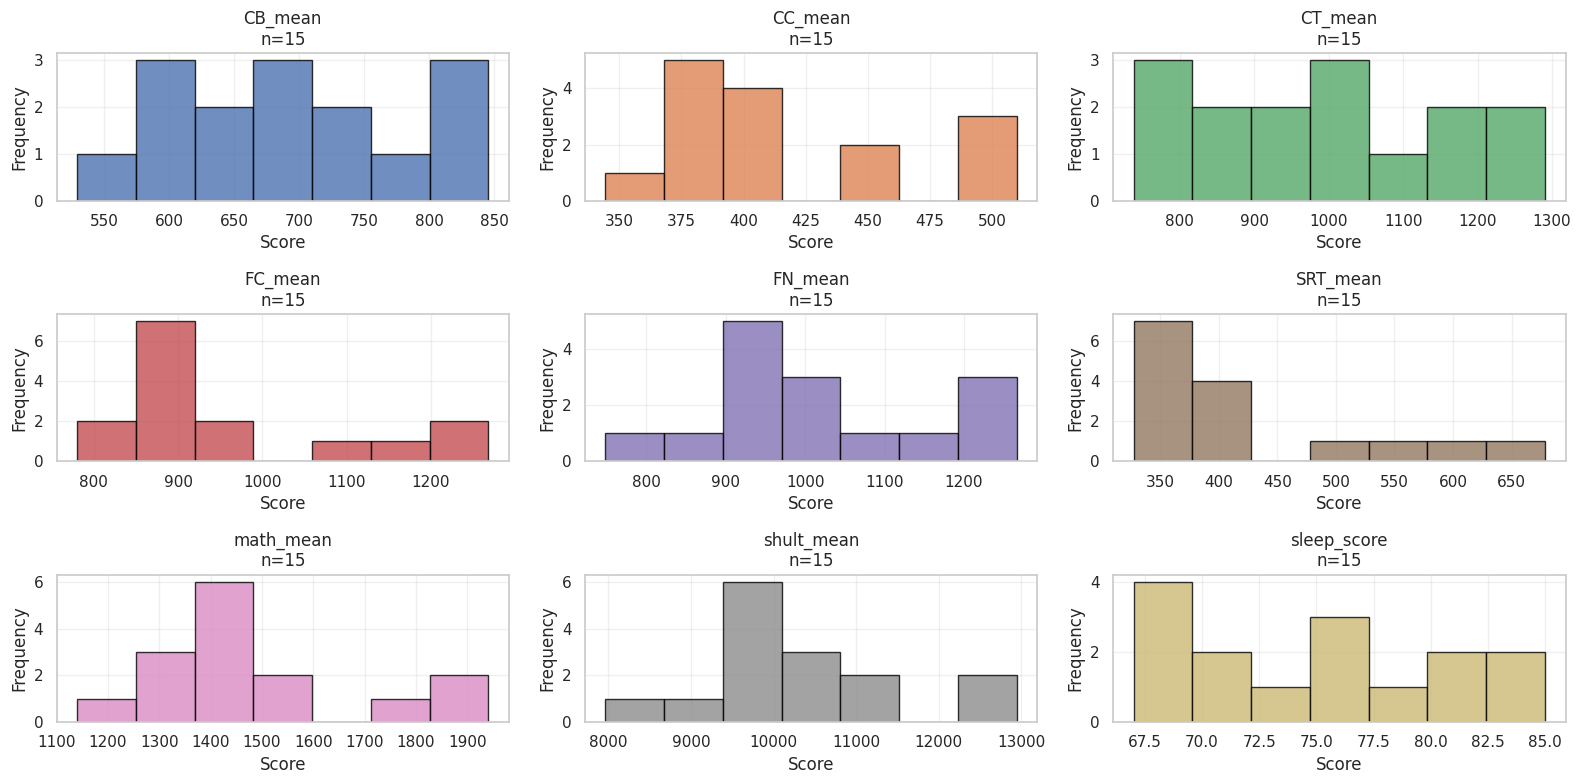

In [ ]:
cols = df.columns.tolist()

fig, axes = plt.subplots(3, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=7, edgecolor='black', alpha=0.8, color=f'C{i}')
    axes[i].set_title(f'{col}\nn={len(df[col].dropna())}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

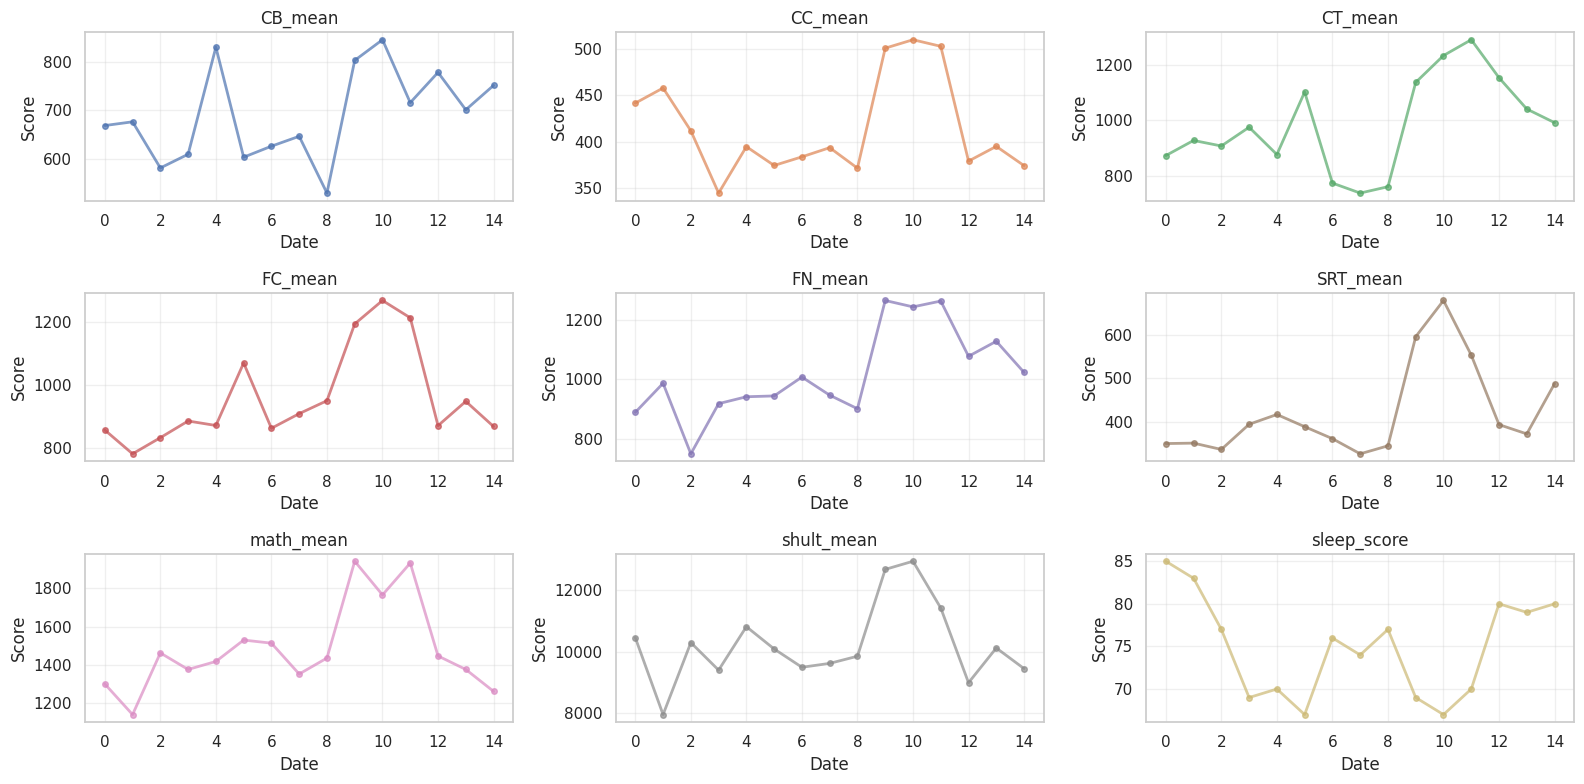

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].plot(df[col], marker='o', markersize=4,
                linewidth=2, alpha=0.7, color=f'C{i}')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Score')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
print("\nТест Shapiro-Wilk:")
normality_results = []
for col in cols:
    if len(df[col].dropna()) > 3:
        stat, p_value = stats.shapiro(df[col].dropna())
        normality_results.append({
            'test': col,
            'statistic': stat,
            'p_value': p_value,
            'normal': p_value > 0.05
        })

norm_df = pd.DataFrame(normality_results)
print(norm_df[['test', 'p_value', 'normal']].to_string())


Тест Shapiro-Wilk:
          test   p_value  normal
0      CB_mean  0.847718    True
1      CC_mean  0.028425   False
2      CT_mean  0.720598    True
3      FC_mean  0.007706   False
4      FN_mean  0.231953    True
5     SRT_mean  0.004180   False
6    math_mean  0.057571    True
7   shult_mean  0.271826    True
8  sleep_score  0.268905    True


##
Корреляционный анализ
##

из-за эффекта обучения значения тестов могут повышатся не от улучшения сна, а от того, что пользователь учится. Это можно исправить вычитанием тренда при его наличии ( в перспективе создание новой метрики, которая будет инвариантна к замене тестов, а также вместе с ней давать разные тесты)
требуется проверить ряд на наличие тренда и если он есть, то вычесть из данных тренд

In [ ]:
correlations = df[df.drop('sleep_score', axis=1).columns.tolist()].corrwith(df['sleep_score']).sort_values(ascending=False)

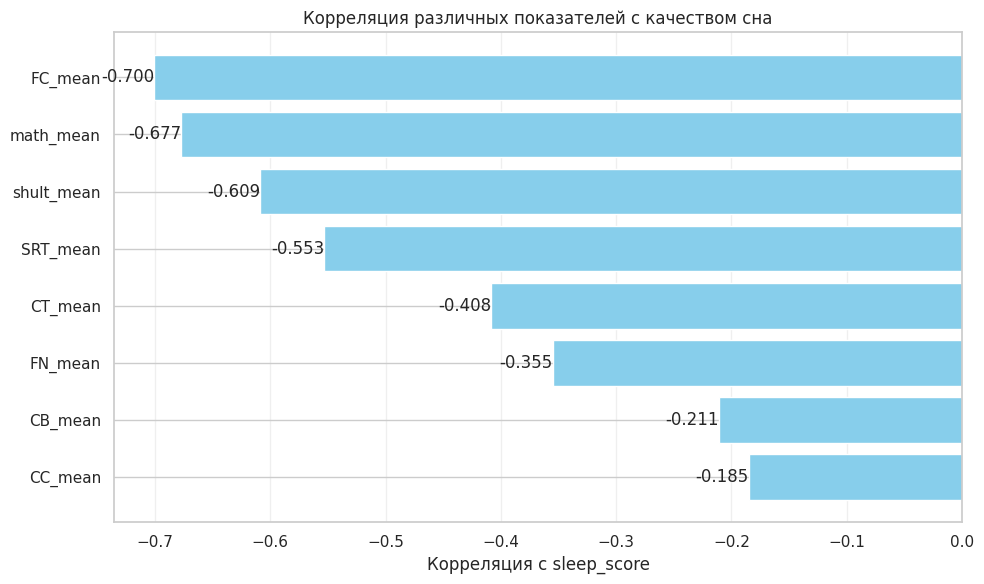

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(correlations.index, correlations.values, color='skyblue')
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlabel('Корреляция с sleep_score')
plt.title('Корреляция различных показателей с качеством сна')
plt.grid(axis='x', alpha=0.3)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             ha='left' if width >= 0 else 'right',
             va='center')

plt.tight_layout()
plt.show()

In [ ]:
for idx, (feature, corr) in enumerate(correlations.items(), 1):
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"{idx}. {feature}: {corr:.3f} ({direction})")

1. CC_mean: -0.185 (отрицательная)
2. CB_mean: -0.211 (отрицательная)
3. FN_mean: -0.355 (отрицательная)
4. CT_mean: -0.408 (отрицательная)
5. SRT_mean: -0.553 (отрицательная)
6. shult_mean: -0.609 (отрицательная)
7. math_mean: -0.677 (отрицательная)
8. FC_mean: -0.700 (отрицательная)


Все исследуемые когнитивные метрики демонстрируют отрицательную корреляцию с целевой переменной sleep_score. Это обьясняется тем, что тесты выражены и милисекундах и чем быстрее тест выполнен, тем лучше.

#
Регрессионный анализ
#

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler

In [ ]:
from itertools import combinations

TARGET = "sleep_score"
ALPHA = 5.0
N_PERMUTATIONS = 1000
rand = 967549
np.random.seed(967549)

features = [c for c in df.columns if c != TARGET]
results = []

loo = LeaveOneOut()

for k in [1, 2]:
    for combo in combinations(features, k):
        X = df[list(combo)]
        y = df[TARGET]

        y_true = []
        y_pred = []

        for train_idx, test_idx in loo.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model = Ridge(alpha=ALPHA, random_state=rand)
            model.fit(X_train_scaled, y_train)

            pred = model.predict(X_test_scaled)[0]

            y_true.append(y_test.values[0])
            y_pred.append(pred)

        r2_loocv = r2_score(y_true, y_pred)
        rmse_loocv = (mean_squared_error(y_true, y_pred))**0.5

        perm_r2_scores = []

        for perm in range(N_PERMUTATIONS):
            y_permuted = np.random.permutation(y.values)

            perm_y_true = []
            perm_y_pred = []

            for train_idx, test_idx in loo.split(X):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train = y_permuted[train_idx]
                y_test_val = y_permuted[test_idx][0]

                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                model = Ridge(alpha=ALPHA, random_state=rand)
                model.fit(X_train_scaled, y_train)

                pred = model.predict(X_test_scaled)[0]

                perm_y_true.append(y_test_val)
                perm_y_pred.append(pred)

            perm_r2 = r2_score(perm_y_true, perm_y_pred)
            perm_r2_scores.append(perm_r2)

        perm_r2_scores = np.array(perm_r2_scores)
        p_value = np.mean(perm_r2_scores >= r2_loocv)

        scaler_full = StandardScaler()
        X_scaled_full = scaler_full.fit_transform(X)

        model_full = Ridge(alpha=ALPHA, random_state=rand)
        model_full.fit(X_scaled_full, y)

        coefs = model_full.coef_
        intercept = model_full.intercept_

        row = {
            "test1": combo[0],
            "test2": combo[1] if k == 2 else None,
            "r2_loocv": r2_loocv,
            "rmse_loocv": rmse_loocv,
            "p_value": p_value,
            "significant_005": p_value < 0.05,
            "significant_001": p_value < 0.01,
            "intercept": intercept,
            "w1": coefs[0],
            "w2": coefs[1] if k == 2 else None
        }

        results.append(row)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("r2_loocv", ascending=False)

In [ ]:
results_df

,test1,test2,r2_loocv,rmse_loocv,p_value,significant_005,significant_001,intercept,w1,w2
28,FC_mean,math_mean,0.368155,4.541921,0.006,True,True,74.866667,-1.919329,-1.621243
16,CC_mean,FC_mean,0.360405,4.569690,0.005,True,True,74.866667,0.924898,-3.460661
3,FC_mean,None,0.349684,4.607829,0.001,True,True,74.866667,-3.001842,NaN
26,FC_mean,FN_mean,0.332508,4.668282,0.004,True,True,74.866667,-3.180807,0.310760
29,FC_mean,shult_mean,0.322468,4.703260,0.006,True,True,74.866667,-2.252016,-1.187917
21,CT_mean,FC_mean,0.316871,4.722647,0.012,True,False,74.866667,-0.191239,-2.898981
27,FC_mean,SRT_mean,0.313085,4.735716,0.005,True,True,74.866667,-2.500574,-0.795451
6,math_mean,None,0.307624,4.754503,0.008,True,True,74.866667,-2.902790,NaN
35,math_mean,shult_mean,0.299280,4.783066,0.004,True,True,74.866667,-2.087316,-1.315119
33,SRT_mean,math_mean,0.296043,4.794103,0.007,True,True,74.866667,-1.078071,-2.295449


Лучшая модель: Наибольшую объяснительную силу (R² = 0.368) демонстрирует модель с двумя предикторами — FC_mean и math_mean. Модель является статистически значимой (p-value пермутационного теста = 0.006 < 0.01).

Второй по силе результат: Модель с одним предиктором FC_mean (R² = 0.350) также показала высокую значимость (p-value = 0.001). Это подтверждает статус FC_mean как ключевого предиктора.

Стабильность результата: В ТОП-10 моделей с наивысшим R² неизменно входят комбинации, содержащие FC_mean, math_mean и shult_mean. Все эти модели статистически значимы на уровне p < 0.05, а большинство — на уровне p < 0.01.

Ненадёжные предикторы: Модели, построенные на признаках CC_mean, CB_mean, FN_mean, CT_mean по отдельности, показали низкое качество (R² < 0) и не достигли статистической значимости. Их использование в отрыве от ключевых метрик нецелесообразн

Использовалась валидация LOOCV для максимального использования данных и дает менее смещенную оценку качества модели в отличие от K fold.
Для оценки значимости использовался пермутационный тест.